In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

In [11]:
# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# 1. Simulated review dataset (replace with CSV for real use)
data = {
    'review': [
        "I absolutely loved this product! It was fantastic!",
        "This is the worst thing I have ever bought.",
        "Not bad, but could be better.",
        "Excellent service and great quality.",
        "Terrible experience, very disappointed.",
        "Okay product. Nothing special.",
        "I’m really happy with my purchase!",
        "Would not recommend this to anyone.",
        "Best value for money. Highly recommended!",
        "Disgusting. Broke after one use."
    ]
}
df = pd.DataFrame(data)


In [13]:
# 2. Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

# Apply cleaning
df['cleaned'] = df['review'].apply(clean_text)


In [14]:
# 3. Sentiment analysis with VADER
sia = SentimentIntensityAnalyzer()
df['scores'] = df['review'].apply(lambda x: sia.polarity_scores(x))
df = pd.concat([df.drop(['scores'], axis=1), df['scores'].apply(pd.Series)], axis=1)

def classify_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)


/tmp/ipython-input-15-3627734480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


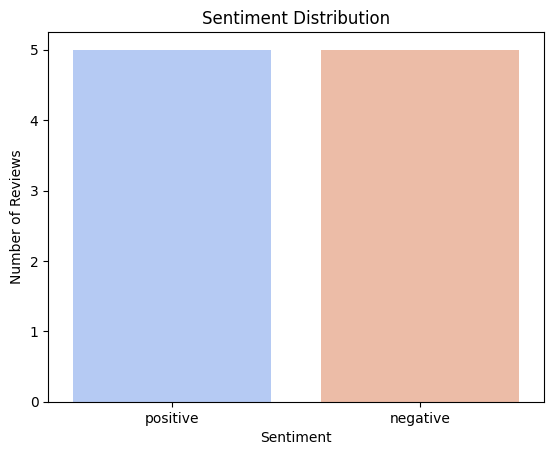

In [15]:
# 4. Sentiment distribution plot
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


/tmp/ipython-input-16-1794305251.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='crest')


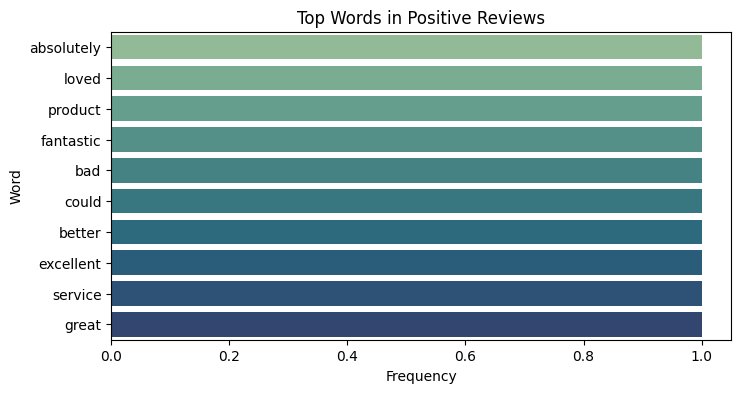

/tmp/ipython-input-16-1794305251.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='crest')


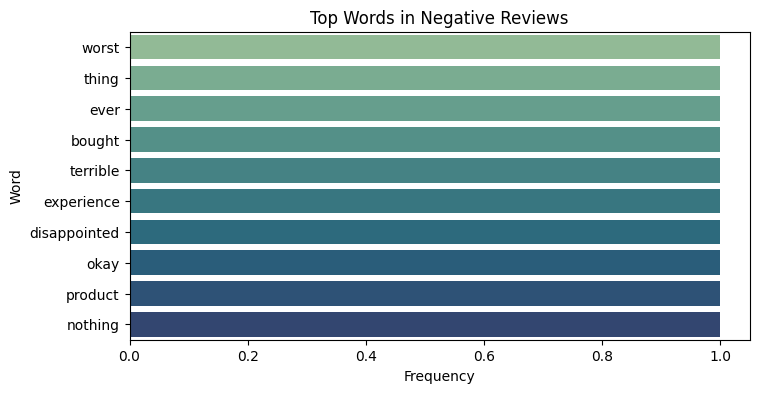

In [16]:
# 5. Word frequency by sentiment
positive_words = []
negative_words = []
for _, row in df.iterrows():
    tokens = word_tokenize(row['cleaned'])
    if row['sentiment'] == 'positive':
        positive_words.extend(tokens)
    elif row['sentiment'] == 'negative':
        negative_words.extend(tokens)

pos_freq = Counter(positive_words).most_common(10)
neg_freq = Counter(negative_words).most_common(10)

def plot_freq(freq_data, title):
    words, counts = zip(*freq_data)
    plt.figure(figsize=(8,4))
    sns.barplot(x=list(counts), y=list(words), palette='crest')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()

plot_freq(pos_freq, "Top Words in Positive Reviews")
plot_freq(neg_freq, "Top Words in Negative Reviews")